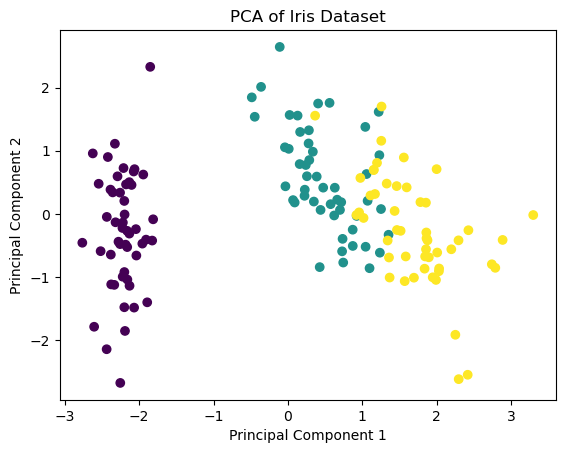

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

def standardize_data(data):
    mean = np.sum(data, axis=0) / data.shape[0]
    centered_data = data - mean
    std_dev = np.sqrt(np.sum(centered_data ** 2, axis=0) / (data.shape[0] - 1))
    standardized_data = centered_data / std_dev
    return standardized_data

X_standardized = standardize_data(X)

def calculate_covariance_matrix(data):
    num_samples = data.shape[0]
    covariance_matrix = np.dot(data.T, data) / (num_samples - 1)
    return covariance_matrix

covariance_matrix = calculate_covariance_matrix(X_standardized)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

num_components = 2 




transformation_matrix = eigenvectors[:, :num_components]


X_pca = np.dot(X_standardized, transformation_matrix)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()


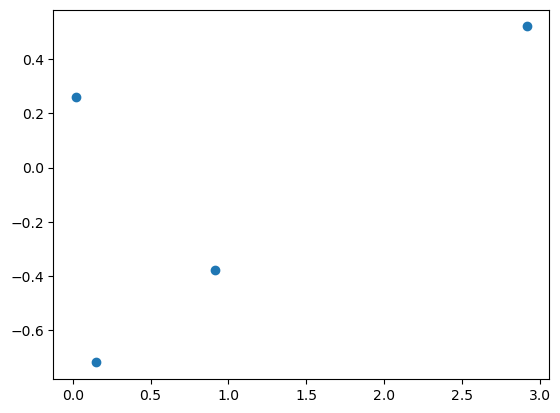

In [13]:
# eigenvectors
# eigenvalues
plt.scatter(eigenvalues, eigenvectors[0])
plt.show()